In [64]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.special import erf
rng = np.random.default_rng(seed=100)

In [18]:
def poisson_regression(k):
    t = np.arange(len(k))
    return sm.GLM(
        k,
        sm.add_constant(t - np.mean(t)),
        family=sm.families.Poisson()
    ).fit()

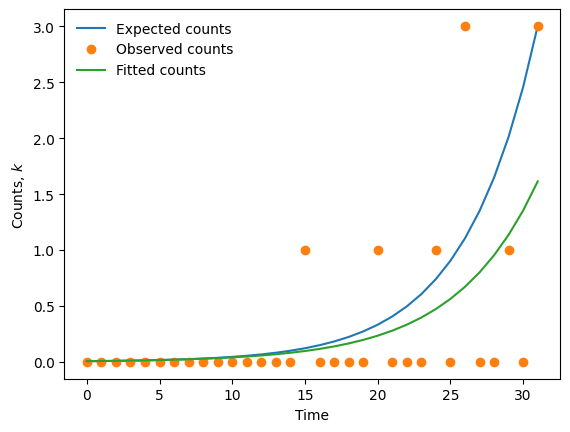

In [22]:
len_series = 32
time = np.arange(len_series)
beta0_true = -2.0
beta1_true = 0.2

lambda_true = np.exp(beta0_true + beta1_true * (time - np.mean(time)))
counts_obs = rng.poisson(lambda_true)

fit = poisson_regression(counts_obs)
fit.fittedvalues

plt.plot(time, lambda_true, label="Expected counts")
plt.plot(time, counts_obs, 'o', label="Observed counts")
plt.plot(time, fit.fittedvalues, label="Fitted counts")
plt.xlabel('Time')
plt.ylabel('Counts, $k$')
plt.legend(loc='upper left')

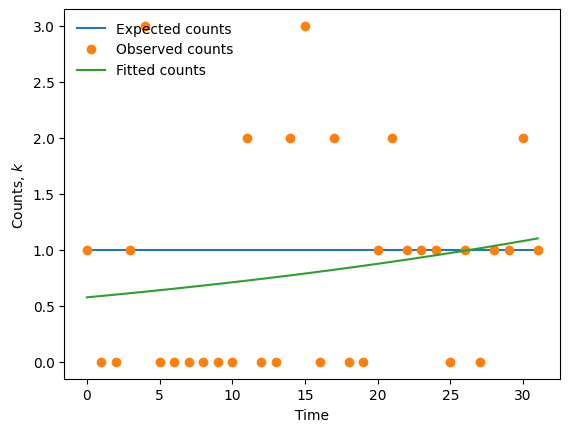

In [28]:
len_series = 32
time = np.arange(len_series)
total_expected_counts = 32
lambda_true = (total_expected_counts / len_series) * np.ones_like(time)
counts_obs = rng.poisson(lambda_true)

fit = poisson_regression(counts_obs)
fit.fittedvalues

plt.plot(time, lambda_true, label="Expected counts")
plt.plot(time, counts_obs, 'o', label="Observed counts")
plt.plot(time, fit.fittedvalues, label="Fitted counts")
plt.xlabel('Time')
plt.ylabel('Counts, $k$')
plt.legend(loc='upper left')

In [29]:
def sample_fits(expected_counts, n_sims, rng):
    for i in range(n_sims):
        simulated_counts = rng.poisson(expected_counts)
        if np.all(simulated_counts == simulated_counts[0]):
            # FIXME: should yield something more informative
            yield None
        else:
            yield poisson_regression(simulated_counts)
            
def sample_parameters(expected_counts, n_sims, rng):
    sp = [
        fit.params if fit else [0.0, 0.0]
        for fit in sample_fits(expected_counts, n_sims, rng)
    ]
    return np.array(sp)

In [81]:
def f(beta):
    return ((beta - 2) * np.exp(beta) + beta + 2) / (2 * beta * np.expm1(beta))

In [106]:
len_series = 32
time = np.arange(len_series)
sigma_t = np.std(time) / time[-1]

total_expected_counts = [16, 32, 64]
n_sims = 100000

samples = []
for tec in total_expected_counts:
    expected_counts = (tec / len_series) * np.ones_like(time)
    samples.append((tec, sample_parameters(expected_counts, n_sims, rng)))

/var/folders/z7/msh2rnmd1n9byj2bzmf14g400000gn/T/ipykernel_13404/3135717043.py:2: RuntimeWarning: invalid value encountered in divide
  return ((beta - 2) * np.exp(beta) + beta + 2) / (2 * beta * np.expm1(beta))


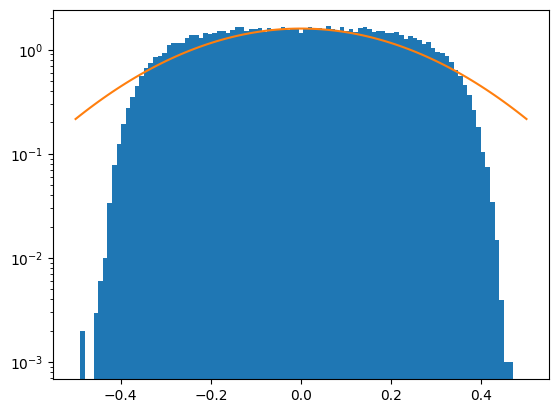

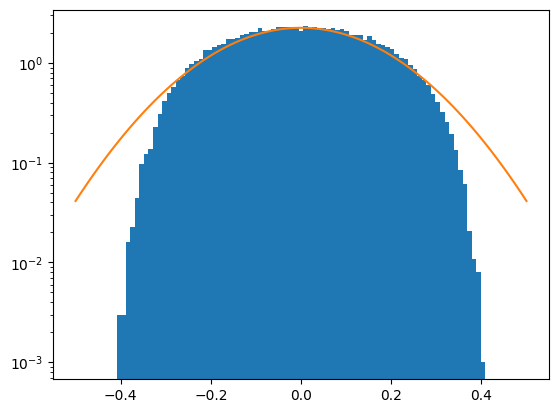

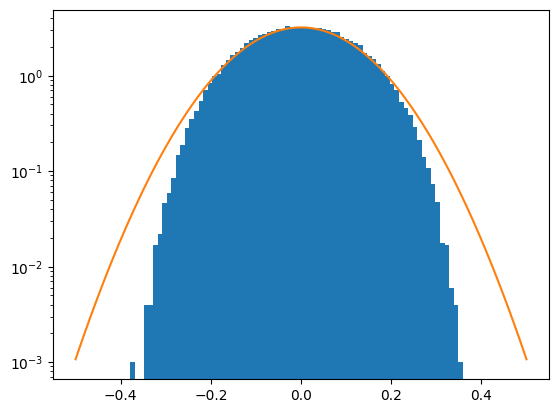

In [108]:
for tec, samp in samples:
    b1 = samp[:, 1]
    b1_scaled = len_series * b1 / sigma_t
    plt.hist(f(b1_scaled), bins=np.linspace(-0.5, 0.5,100), log=True, density=True)
    x = np.linspace(-0.5, 0.5,100)
    plt.plot(x, stats.norm(0, scale=1 / np.sqrt(tec)).pdf(x))
    plt.show()

In [111]:
?plt.hist

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in each bin, then draws the distribution either as a
`.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
*weights* parameters are forwarded to `numpy.histogram`.

If the data has already been binned and counted, use `~.bar` or
`~.stairs` to plot the distribution::

    counts, bins = np.histogram(x)
    plt.stairs(bins, counts)

Alternatively, plot pre-computed bins and counts using ``hist()`` by
treating each bin as a single point with a weight equal to its count::

    plt.hist(bins[:-1], bins, weights=counts)

The data input

/var/folders/z7/msh2rnmd1n9byj2bzmf14g400000gn/T/ipykernel_13404/3135717043.py:2: RuntimeWarning: invalid value encountered in divide
  return ((beta - 2) * np.exp(beta) + beta + 2) / (2 * beta * np.expm1(beta))


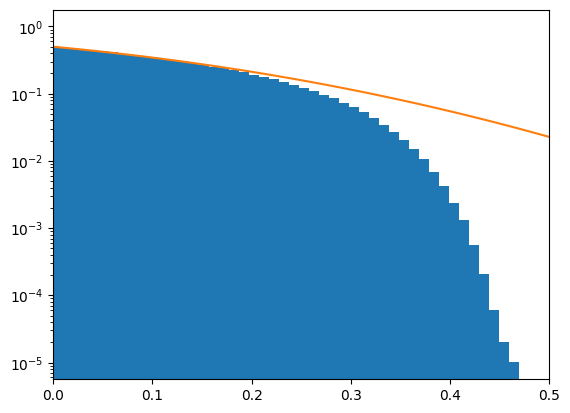

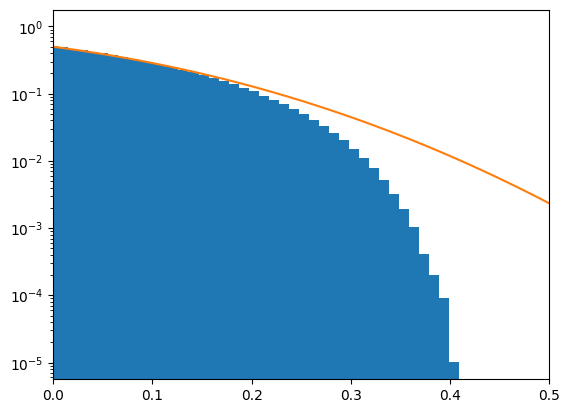

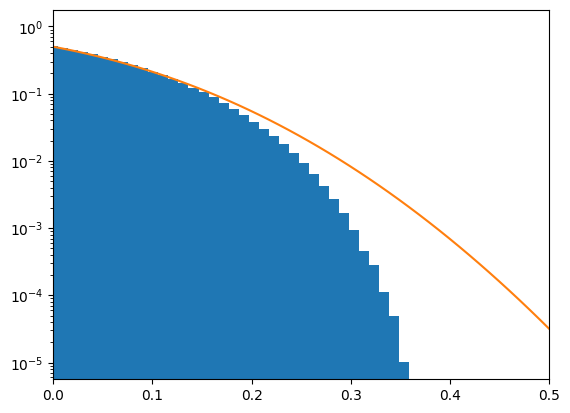

In [117]:
for tec, samp in samples:
    b1 = samp[:, 1]
    b1_scaled = len_series * b1 / sigma_t
    plt.hist(
        f(b1_scaled),
        bins=np.linspace(-0.5, 0.5,100),
        cumulative=-1,
        density=True,
        log=True
    )
    x = np.linspace(-0.5, 0.5,100)
    plt.plot(x, 1 - stats.norm(0, scale=1 / np.sqrt(tec)).cdf(x))
    plt.xlim([0, 0.5])
    plt.show()

/var/folders/z7/msh2rnmd1n9byj2bzmf14g400000gn/T/ipykernel_13404/3135717043.py:2: RuntimeWarning: invalid value encountered in divide
  return ((beta - 2) * np.exp(beta) + beta + 2) / (2 * beta * np.expm1(beta))


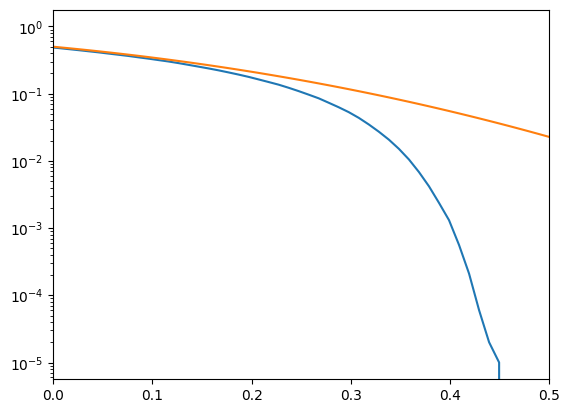

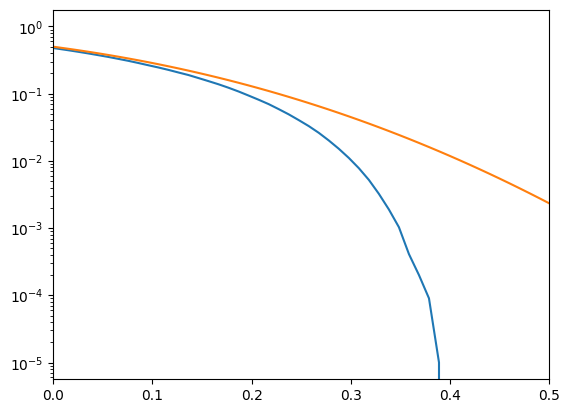

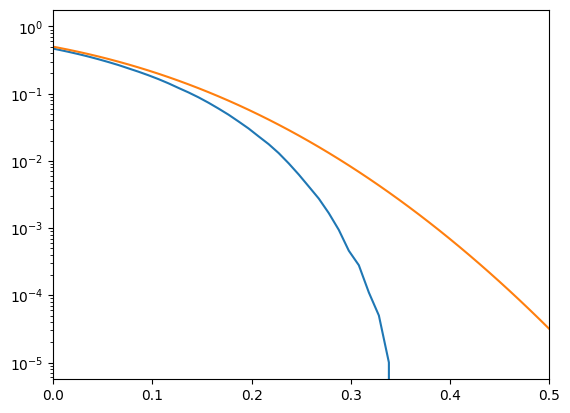

In [136]:
hists = []
for tec, samp in samples:
    b1 = samp[:, 1]
    b1_scaled = len_series * b1 / sigma_t
    x = np.linspace(-0.5, 0.5, 100)
    hist = np.histogram(
        f(b1_scaled),
        bins=x,
        density=False,
    )[0]
    hists.append(hist)
    
    plt.plot(
        x[:-1],
        1 - np.cumsum(hist)/np.sum(hist),
    )
    plt.plot(
        x,
        1 - stats.norm(0, scale=1 / np.sqrt(tec)).cdf(x)
    )
    plt.xlim([0, 0.5])
    plt.yscale('log')
    plt.show()    

/var/folders/z7/msh2rnmd1n9byj2bzmf14g400000gn/T/ipykernel_13404/1588466745.py:3: RuntimeWarning: divide by zero encountered in divide
  (1 - np.cumsum(hists[1])/np.sum(hists[1])) / (1 - np.cumsum(hists[2])/np.sum(hists[2]))
/var/folders/z7/msh2rnmd1n9byj2bzmf14g400000gn/T/ipykernel_13404/1588466745.py:3: RuntimeWarning: invalid value encountered in divide
  (1 - np.cumsum(hists[1])/np.sum(hists[1])) / (1 - np.cumsum(hists[2])/np.sum(hists[2]))


(0.0, 0.5)

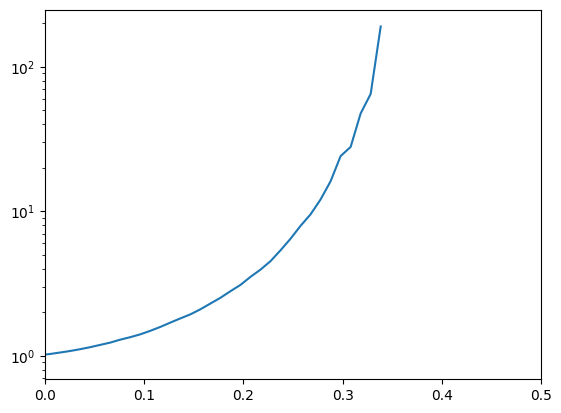

In [141]:
plt.plot(
    x[:-1],
    (1 - np.cumsum(hists[1])/np.sum(hists[1])) / (1 - np.cumsum(hists[2])/np.sum(hists[2]))
)
plt.yscale("log")
plt.xlim([0,0.5])

In [142]:
range("A", "H")

TypeError: 'str' object cannot be interpreted as an integer